In [1]:
import nibabel as nib

In [2]:
import dipy.data as dpd

In [3]:
img = dpd.read_stanford_t1()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/stanford_hardi 


In [4]:
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline

In [5]:
data = img.get_data()

In [6]:
data.shape

(81, 106, 76)

mri-zstack.mp4


/Users/arokem/anaconda/lib/python3.5/site-packages/numpy-1.11.0b2-py3.5-macosx-10.5-x86_64.egg/numpy/ma/core.py:3113: FutureWarning: Currently, slicing will try to return a view of the data, but will return a copy of the mask. In the future, it will try to return both as views.
  FutureWarning


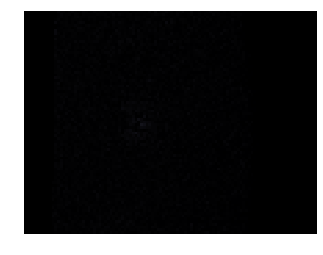

In [35]:
fig, ax = plt.subplots(1)
ax.set_axis_off()
fig.add_axes(ax)

def f(i):
    return data[:, :, i]

i = 0
j = 0

im = ax.imshow(f(i), 
               cmap=plt.get_cmap('bone'), 
               animated=True, 
               interpolation='nearest', 
               vmax=data.max(), 
               vmin=data.min())


def updatefig(*args):
    global i
    global j
    im.set_array(f(i))
    if j > 74:
        i = i - 1
    else:
        i = i + 1 
    j = j + 1
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=150)
out_fname = "mri-zstack.mp4"
print(out_fname)
ani.save(out_fname, fps=12)

In [36]:
!open mri-zstack.mp4